<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/GraphOperation/HouseCentroid2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np

cells = cv2.imread('/content/Artboard 1 copy 4-4.png',0)
cells = 255 - cells
_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
ret,thresh = cv2.threshold(cells,100,255,cv2.THRESH_BINARY_INV)


labels= measure.label(thresh, background=0)
bg_label = labels[0,0]
labels[labels==bg_label] = 0 # Assign background label to 0

props = measure.regionprops(labels)
centroids = np.zeros(shape=(len(np.unique(labels)),2)) # Access the coordinates of centroids


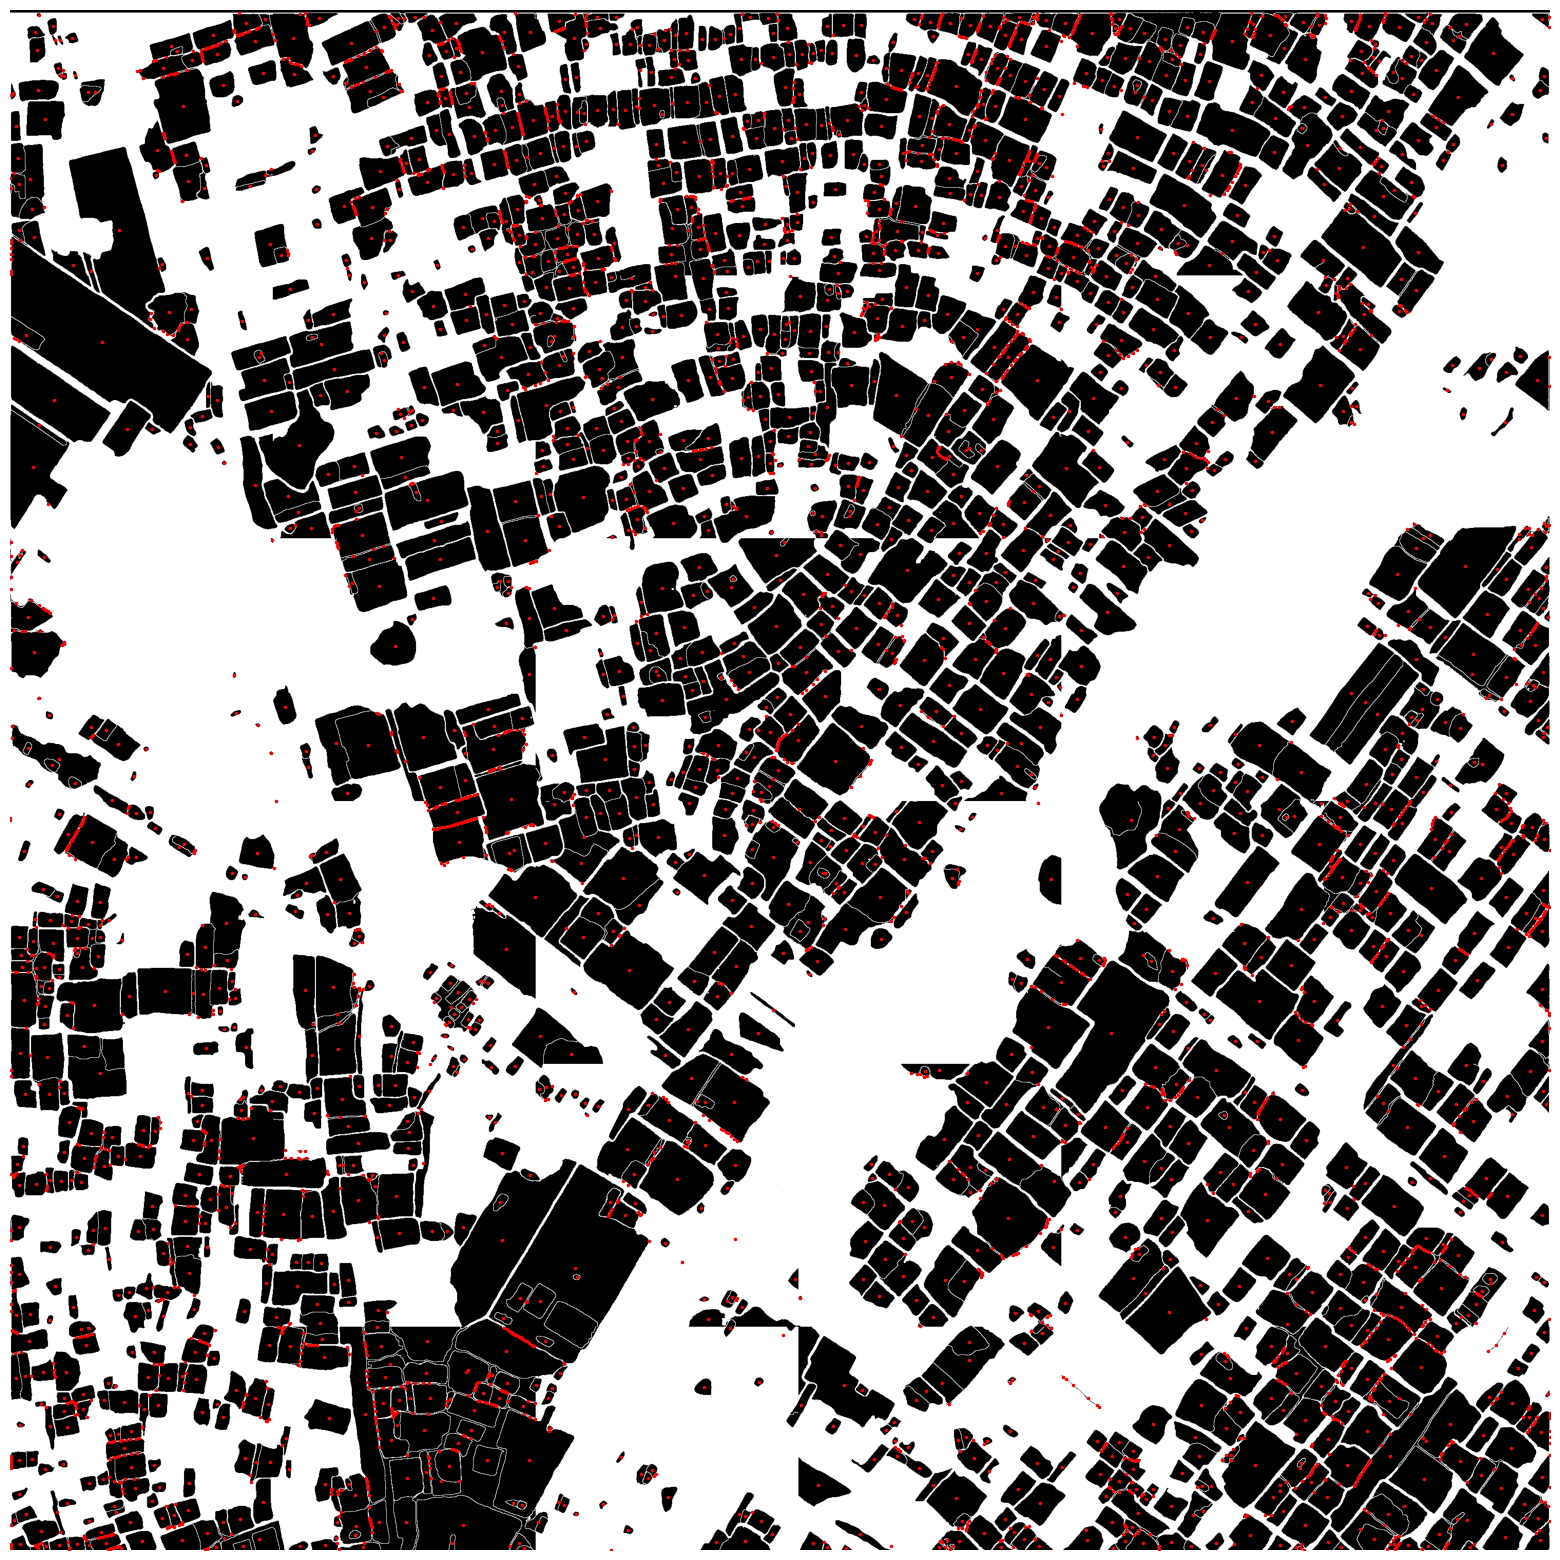

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cells,cmap='gray')

for i,prop in enumerate(props):
    my_centroid = prop.centroid
    centroids[i,:]= my_centroid
    ax.plot(my_centroid[1],my_centroid[0],'r.',markersize=3)

plt.show()

In [ ]:
len(centroids)

4817

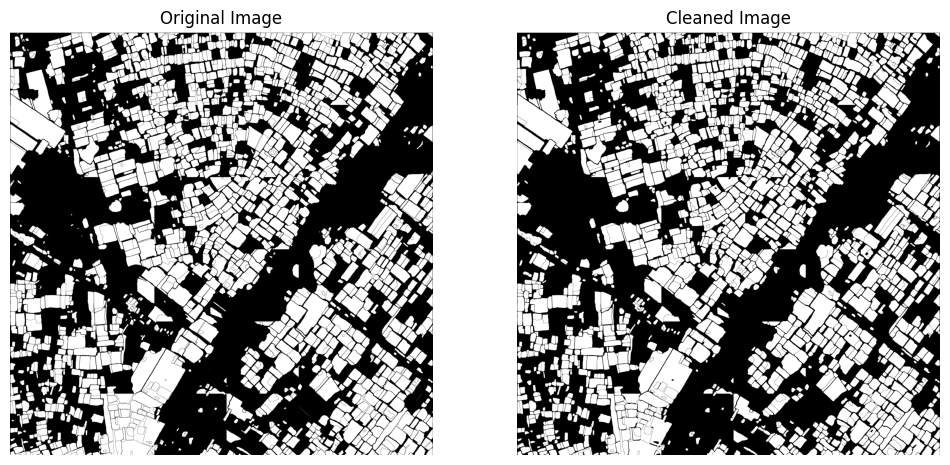

In [11]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np

# Read the image and convert to binary
cells = cv2.imread('/content/Artboard 1 copy 4-4.png', 0)
cells = 255 - cells  # Invert colors if needed
_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)
revert = 255-cells
# Apply morphological operations to clean up noise
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)

# Loop through all detected regions
for prop in props:
    if prop.area >= 200:  # Keep regions with area >= 20 pixels
        # Add the region to the cleaned_cells image
        if prop.area >=2000 :
          cleaned_cells[labels == prop.label] = 195
        else:
          cleaned_cells[labels == prop.label] = 255

# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()


In [12]:
centroids = np.zeros(shape=(len(np.unique(labels)),2)) # Access the coordinates of centroids

[[   8.75675676   55.02702703]
 [   6.          446.        ]
 [   6.          574.5       ]
 ...
 [2999.          379.        ]
 [2999.         1171.        ]
 [   0.            0.        ]]


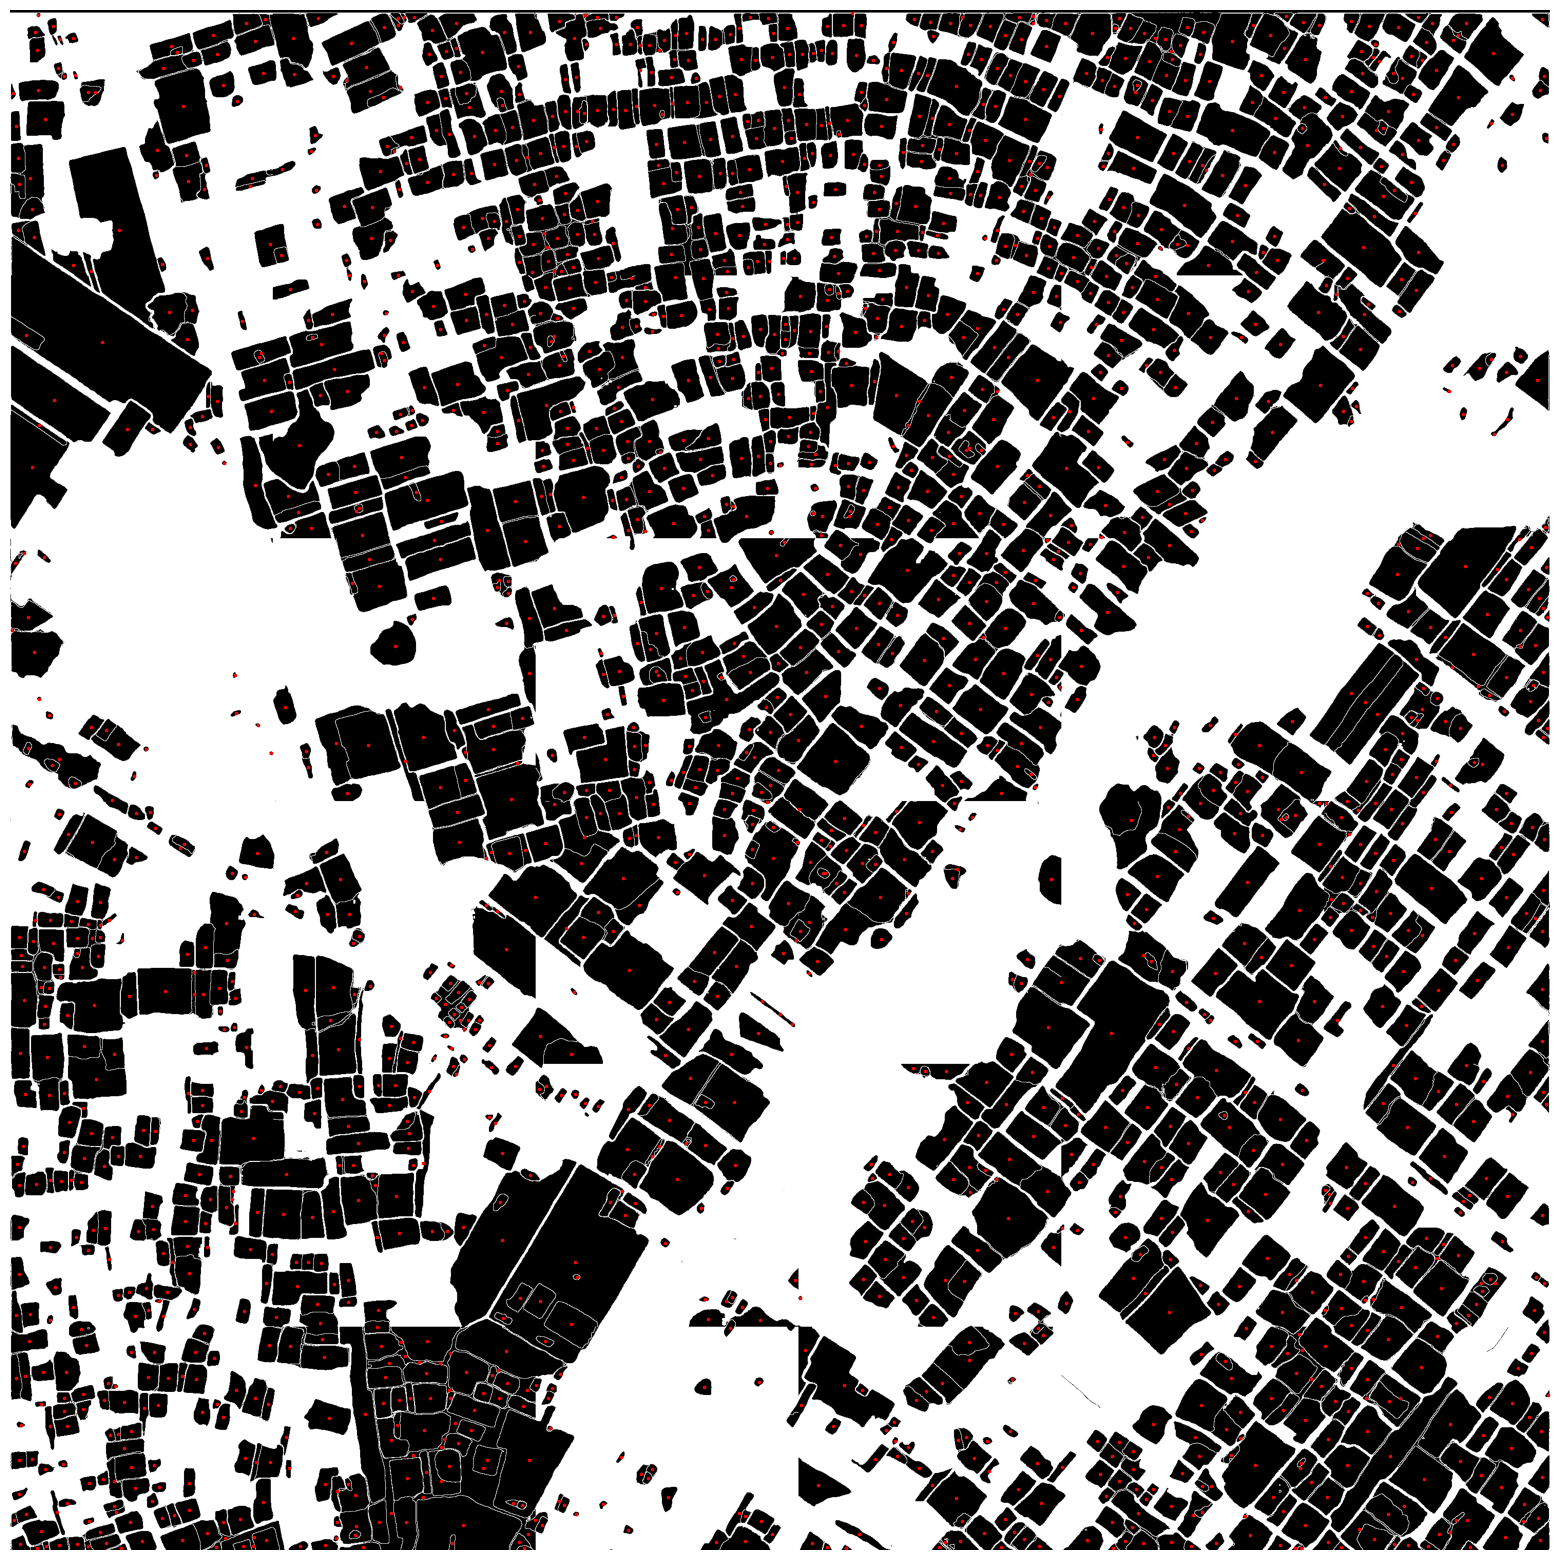

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cells,cmap='gray')

for i,prop in enumerate(props):
    my_centroid = prop.centroid
    centroids[i,:]= my_centroid
    ax.plot(my_centroid[1],my_centroid[0],'r.',markersize=3)

plt.show()

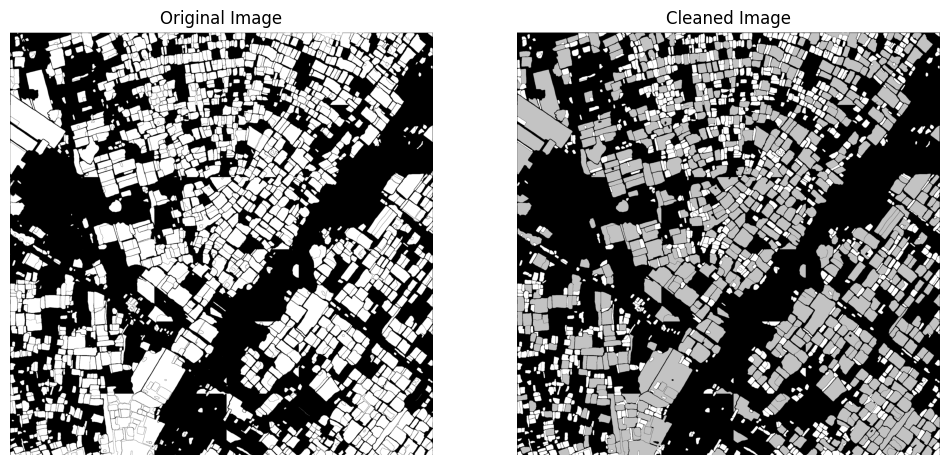

In [18]:
kernel = np.ones((5, 5), np.uint8)
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)

# Label the connected components
labels = measure.label(cleaned_paths, background=0)
props = measure.regionprops(labels)

# Create a new image to store the cleaned cells, initially set all to background (0)
cleaned_cells = np.zeros_like(cells)

# Loop through all detected regions
for prop in props:
    if prop.area >= 200:  # Keep regions with area >= 20 pixels
        # Add the region to the cleaned_cells image
        if prop.area >=2000 :
          cleaned_cells[labels == prop.label] = 195
        else:
          cleaned_cells[labels == prop.label] = 255

# Display the original and cleaned images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(revert, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_cells, cmap='gray')
ax[1].set_title('Cleaned Image')
ax[1].axis('off')

plt.show()